<a href="https://colab.research.google.com/github/mrj760/Data-Science-Assignments/blob/main/CS410_Assignment_1_Micah_Johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

CS410: Principles and Techniques of Data Science 

Assignment 1: Python 

Due: Monday, September 12 

Name: Micah Johnson

.

This is an individual assignment. Use Google Colab for your code, plots, and comments. Copy the link of the Colab notebook and paste it in the same notebook and also in the comments section of Canvas. 

When you finish editing, re-run all the cells to make sure they work and then convert your notebook into a pdf (using print function). Then upload the pdf file on Canvas. 

In 2011, URL shortening service [Bitly](https://bitly.com/) partnered with the US government website [USA.gov](https://www.usa.gov/) to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available as downloadable text files. Currently, the service is shut down, but the data is accessible for research purposes. 
You can access the data from [here](https://drive.google.com/file/d/1KAwSElsyqRtCWL4Ah6huMockl-bHW-Se/view?usp=sharing). 

If we read just the first line of a file we may see something like this: 

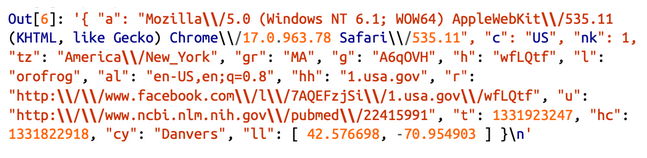

.

Your tasks are the following: 

Find the top 5 time zones (the tz field) and their counts 

Find the number of times country is “US” (the c field)


Keys:
a, c, nk, tz, gr, g, h, l, al, hh, r, u, t, hc, cy, ll

# Set-Up Code

Retrieve the data and parse it into a splittable form so it can be transformed into dictionaries

In [ ]:
''' import requests to get the example.txt from an external source '''
import requests as req

data = req.get('https://raw.githubusercontent.com/mrj760/CS410---Assignment-1-Res/main/example.txt').text # Contains all requests separated by newlines
data = data.split('\n')

for line in data:

  ''' Skip over instances which are just heartbeats '''
  if '_heartbeat_' in line : continue

  ''' Prepare every line to be split as : [key,value,key,value...key,value] '''
  line = line.replace('{', '').replace('}', '').replace(':', '').replace(' ', '').replace(',\"', '\"').replace('\"\"', '\"')[1:]

  ''' Prepare to iterate over the elments to store them as key value pairs in a dictionary '''
  key_vals = line.strip().split("\"")
  
  
  ''' Populate a dictionary representing a single request which will be appended to a list of many request dictionaries '''
  request_dict = dict()
  requests = list()
  key = None
  val = None
  every_other = 1 # Track whether the current iteration is looking at a key or a value
  for elmt in key_vals:

    if every_other % 2 == 1:
      key = elmt

    else:
      val = elmt
      request_dict[key] = val # Add a (key,value) to this request's dictionary

    every_other = every_other + 1

  ''' End Loop: (for elmnt in key_vals) 
      Add the finished dictionary to the list '''
  requests.append(request_dict)

  # break

''' show it worked '''
i = 0
for req in requests: 
  if i > 8: break
  print(req)
  i = i + 1

{'a': 'Mozilla\\/5.0(WindowsNT6.1;WOW64)AppleWebKit\\/535.11(KHTML,likeGecko)Chrome\\/17.0.963.78Safari\\/535.11', 'c': 'US', 'nk': '1', 'tz': 'America\\/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf', 'u': 'http\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991', 't': '1331923247', 'hc': '1331822918', 'cy': 'Danvers', 'll': '[42.576698,-70.954903]'}
{'a': 'GoogleMaps\\/RochesterNY', 'c': 'US', 'nk': '0', 'tz': 'America\\/Denver', 'gr': 'UT', 'g': 'mwszkS', 'h': 'mwszkS', 'l': 'bitly', 'hh': 'j.mp', 'r': 'http\\/\\/www.AwareMap.com\\/', 'u': 'http\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php', 't': '1331923249', 'hc': '1308262393', 'cy': 'Provo', 'll': '[40.218102,-111.613297]'}
{'a': 'Mozilla\\/4.0(compatible;MSIE8.0;WindowsNT6.1;WOW64;Trident\\/4.0;SLCC2;.NETCLR2.0.50727;.NETCLR3.5.30729;.NETCLR3.0.30729;MediaCenterPC6.0;.NET4.0C;.NET4.0E;InfoPath.3)'

# Task 1
Find the top 5 number of occurances of each timezone with the data.

In [ ]:
# empty dictionary to store number of occurences for each timezone
tz_dict = dict()

''' Go through each request and find its "tz" value.
    If the given timezone already exists in (tz_dict), add to its occurence count.
    Else add the timezone as a new entry, specifying that it has occured once. '''
for req in requests:

  tz = req.get('tz')

  if tz == '': continue # Do not count empty timezone fields. 
  
  if tz in tz_dict:
    tz_dict[tz] = tz_dict[tz]+1
  else:
    tz_dict[tz] = 1


''' Print a list of tuples out of the new dictionary.
    The tuples are comprised of the timezone names and the number of times they've occured
    The list is reverse sorted by the number of occurences
    The list is cut off so that it only includes the first 5 elements '''
i=1
for item in (list(reversed(sorted(zip(tz_dict.keys(), tz_dict.values()), key=lambda x: x[1]))))[0:5]:
  loc = item[0].replace('\\/', ', ').replace('_', ' ')
  print (f"Result {i}: ({loc}) \n\t  Occuring {item[1]} times\n")
  i = i+1

Result 1: (America, New York) 
	  Occuring 1251 times

Result 2: (America, Chicago) 
	  Occuring 400 times

Result 3: (America, Los Angeles) 
	  Occuring 382 times

Result 4: (America, Denver) 
	  Occuring 191 times

Result 5: (Europe, London) 
	  Occuring 74 times



# Task 2
Find the number of times the country is "US"

In [ ]:
''' Iterate through the requests and count the number of times the "c" field reads "US" '''

US_count = 0
for req in requests:
  if req.get('c') == 'US':
    US_count = US_count + 1

print(f"The US shows up {US_count} times.")

The US shows up 2305 times.
